In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import string
import re

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado
# ==============================================================================
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
tweets = pd.read_csv("/content/Tweets.csv",encoding='latin1')

In [4]:
tweets.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [9]:
import re

# Define a function to clean the text
def clean(text):
    # Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text) 
    return text

# Cleaning the text in the review column
tweets['Cleaned tweets'] = tweets['text'].apply(clean)
tweets.head()

,textID,text,selected_text,sentiment,Cleaned tweets
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,I d have responded if I were going
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD I will miss you here in San Diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,Sons of why couldn t they put them on the rel...


In [10]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

tweets['POS tagged'] = tweets['Cleaned tweets'].apply(token_stop_pos)
tweets.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


,textID,text,selected_text,sentiment,Cleaned tweets,POS tagged
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,I d have responded if I were going,"[(responded, v), (going, v)]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD I will miss you here in San Diego,"[(Sooo, n), (SAD, n), (miss, v), (San, n), (Di..."
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,"[(boss, n), (bullying, v)]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,"[(interview, n), (leave, v), (alone, r)]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,Sons of why couldn t they put them on the rel...,"[(Sons, n), (put, v), (releases, n), (already,..."


In [11]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
tweets['Lemma'] = tweets['POS tagged'].apply(lemmatize)
tweets.head()

,textID,text,selected_text,sentiment,Cleaned tweets,POS tagged,Lemma
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,I d have responded if I were going,"[(responded, v), (going, v)]",respond go
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD I will miss you here in San Diego,"[(Sooo, n), (SAD, n), (miss, v), (San, n), (Di...",Sooo SAD miss San Diego
2,088c60f138,my boss is bullying me...,bullying me,negative,my boss is bullying me,"[(boss, n), (bullying, v)]",bos bully
3,9642c003ef,what interview! leave me alone,leave me alone,negative,what interview leave me alone,"[(interview, n), (leave, v), (alone, r)]",interview leave alone
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,Sons of why couldn t they put them on the rel...,"[(Sons, n), (put, v), (releases, n), (already,...",Sons put release already buy


In [12]:
tweets[['text', 'Lemma']]

,text,Lemma
0,"I`d have responded, if I were going",respond go
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD miss San Diego
2,my boss is bullying me...,bos bully
3,what interview! leave me alone,interview leave alone
4,"Sons of ****, why couldn`t they put them on t...",Sons put release already buy
...,...,...
27475,wish we could come see u on Denver husband l...,wish could come see u Denver husband lose jo...
27476,I`ve wondered about rake to. The client has ...,wonder rake client make clear NET force devs...
27477,Yay good for both of you. Enjoy the break - y...,Yay good Enjoy break probably need hectic we...
27478,But it was worth it ****.,worth


**Analisis de sentimiento usando TextBlob**

In [13]:
from textblob import TextBlob

# function to calculate subjectivity 
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity

# function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [14]:
data = pd.DataFrame(tweets[['text', 'Lemma']])

In [15]:
data['Polarity'] = data['Lemma'].apply(getPolarity) 
data['Analysis'] = data['Polarity'].apply(analysis)
data.head()

,text,Lemma,Polarity,Analysis
0,"I`d have responded, if I were going",respond go,0.0,Neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD miss San Diego,-0.5,Negative
2,my boss is bullying me...,bos bully,0.0,Neutral
3,what interview! leave me alone,interview leave alone,0.0,Neutral
4,"Sons of ****, why couldn`t they put them on t...",Sons put release already buy,0.0,Neutral


In [17]:
tb_counts = data.Analysis.value_counts()
tb_counts

Positive    12465
Neutral     10056
Negative     4959
Name: Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f527f018f50>,
 [Text(0.15977069643680475, 1.0883351159271204, 'Positive'),
  Text(-0.719257579410967, -0.832267105237181, 'Neutral'),
  Text(1.138799529863453, -0.7250073315372603, 'Negative')],
 [Text(0.0871476526018935, 0.5936373359602474, '45.4%'),
  Text(-0.3923223160423456, -0.4539638755839168, '36.6%'),
  Text(0.7170219262103221, -0.45648609763457115, '18.0%')])

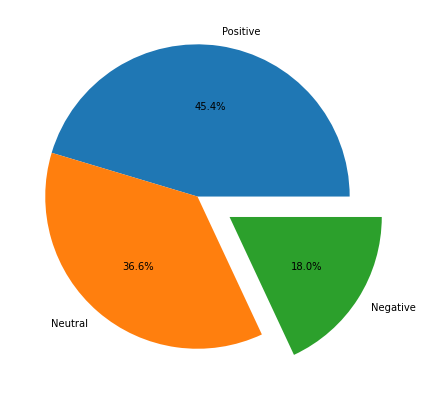

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

**Analisis de sentimiento usando VADER**

In [20]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 20.2 MB/s 


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

data['Vader Sentiment'] = data['Lemma'].apply(vadersentimentanalysis)

In [23]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.1 :
        return 'Negative'
    else:
        return 'Neutral'
    
data['Vader Analysis'] = data['Vader Sentiment'].apply(vader_analysis)
data.head()

,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,"I`d have responded, if I were going",respond go,0.0,Neutral,0.0000,Neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD miss San Diego,-0.5,Negative,-0.6633,Negative
2,my boss is bullying me...,bos bully,0.0,Neutral,-0.4939,Negative
3,what interview! leave me alone,interview leave alone,0.0,Neutral,-0.2960,Negative
4,"Sons of ****, why couldn`t they put them on t...",Sons put release already buy,0.0,Neutral,0.0000,Neutral


In [24]:
vader_counts = data['Vader Analysis'].value_counts()
vader_counts

Neutral     14017
Positive     7942
Negative     5521
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f527f1f75d0>,
 [Text(-0.03799450261830918, 1.1993983565816604, 'Neutral'),
  Text(-0.620661117549336, -0.908173869455849, 'Positive'),
  Text(0.8880670829965036, -0.6491046572765298, 'Negative')],
 [Text(-0.022163459860680353, 0.6996490413393017, '51.0%'),
  Text(-0.33854242775418325, -0.4953675651577358, '28.9%'),
  Text(0.48440022708900193, -0.354057085787198, '20.1%')])

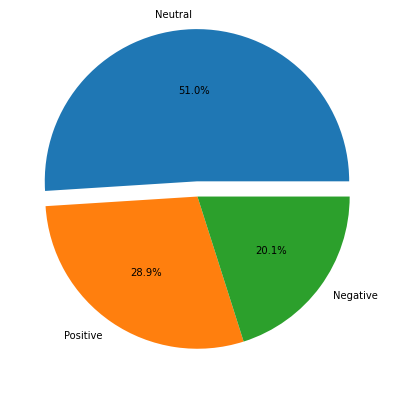

In [25]:
vader_counts= data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)

**Analisis using SentiWordNet**

In [26]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return 0
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

data['SWN analysis'] = tweets['POS tagged'].apply(sentiwordnetanalysis)
data.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,text,Lemma,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,"I`d have responded, if I were going",respond go,0.0,Neutral,0.0000,Neutral,Neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD miss San Diego,-0.5,Negative,-0.6633,Negative,Negative
2,my boss is bullying me...,bos bully,0.0,Neutral,-0.4939,Negative,Positive
3,what interview! leave me alone,interview leave alone,0.0,Neutral,-0.2960,Negative,Neutral
4,"Sons of ****, why couldn`t they put them on t...",Sons put release already buy,0.0,Neutral,0.0000,Neutral,Positive


In [27]:
swn_counts= data['SWN analysis'].value_counts()
swn_counts

Positive    13378
Negative     7134
Neutral      6357
0             611
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f5275636dd0>,
 [Text(0.04964770414254228, 1.1989725207332214, 'Positive'),
  Text(-0.8176276052867504, -0.7358567109655616, 'Negative'),
  Text(0.7122868371190683, -0.8382406943515174, 'Neutral'),
  Text(1.0973175312967158, -0.07677392466769827, '0')],
 [Text(0.028961160749816327, 0.699400637094379, '48.7%'),
  Text(-0.44597869379277294, -0.40137638779939716, '26.0%'),
  Text(0.38852009297403717, -0.45722219691900945, '23.1%'),
  Text(0.598536835252754, -0.041876686182380864, '2.2%')])

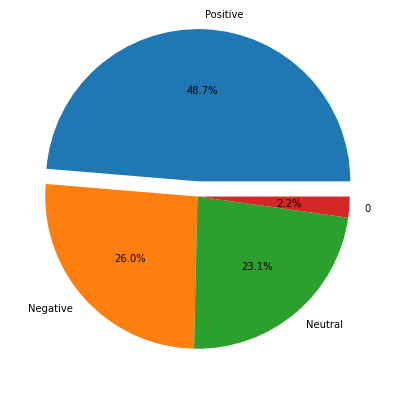

In [34]:
swn_counts= data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0, 0), autopct='%1.1f%%', shadow=False)

([<matplotlib.patches.Wedge at 0x7f52756c9410>,
 [Text(0.045510395463997086, 1.099058144005453, 'Positive'),
  Text(-0.8176276052867504, -0.7358567109655616, 'Negative'),
  Text(0.8741702091915837, -1.0287499430677713, 'Neutral'),
  Text(1.0973175312967158, -0.07677392466769827, '0')],
 [Text(0.024823852071271135, 0.5994862603666106, '48.7%'),
  Text(-0.44597869379277294, -0.40137638779939716, '26.0%'),
  Text(0.5504034650465527, -0.6477314456352634, '23.1%'),
  Text(0.598536835252754, -0.041876686182380864, '2.2%')])

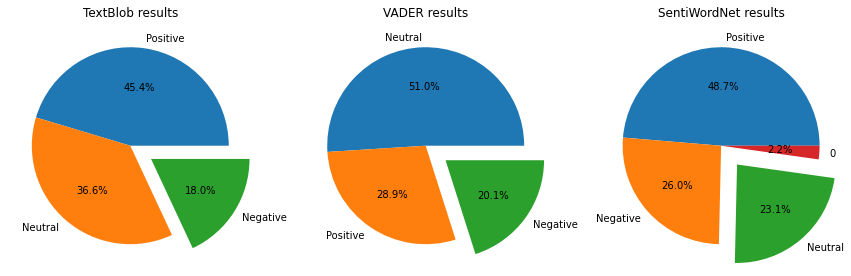

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25, 0), autopct='%1.1f%%', shadow=False)